In [1]:
%matplotlib inline
import sys
import os
import os.path
import subprocess
import numpy as np

import tables as tb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval

In [2]:
from hetdex_api.shot import *

In [3]:
shotlist = {}
__ = """20191203_0000024
20191221_0000022
20191203_0000025
20191222_0000023
20191221_0000023
20191224_0000024
20191222_0000024
20191229_0000023
20191231_0000024
20200101_0000019
20191231_0000025
20200101_0000020"""
shotlist["gama09E"] = __.split()


__ = """20200118_0000017
20200215_0000016
20200119_0000018
20200217_0000014
20200124_0000016
20200217_0000015
20200119_0000019
20200225_0000016
20200125_0000020
20200315_0000012
20200126_0000020"""
shotlist["gama09F"] = __.split()

In [9]:
fileh = tb.open_file(os.path.join("../gama_recon/",shotlist["gama09E"][0] + ".h5"))

In [10]:
fileh.root.Info

/Info (Table(80640,)) 'Fiber Information'
  description := {
  "amp": StringCol(itemsize=2, shape=(), dflt=b'', pos=0),
  "dec": Float32Col(shape=(), dflt=0.0, pos=1),
  "exp": Int32Col(shape=(), dflt=0, pos=2),
  "ifuid": Int32Col(shape=(), dflt=0, pos=3),
  "ifuslot": Int32Col(shape=(), dflt=0, pos=4),
  "ifux": Float32Col(shape=(), dflt=0.0, pos=5),
  "ifuy": Float32Col(shape=(), dflt=0.0, pos=6),
  "ra": Float32Col(shape=(), dflt=0.0, pos=7),
  "specid": Int32Col(shape=(), dflt=0, pos=8)}
  byteorder := 'little'
  chunkshape := (1927,)

In [11]:
fileh.root.CatSpectra

/CatSpectra (Table(357,)) 'Spectral Extraction Information'
  description := {
  "dec": Float32Col(shape=(), dflt=0.0, pos=0),
  "error": Float32Col(shape=(1036,), dflt=0.0, pos=1),
  "ra": Float32Col(shape=(), dflt=0.0, pos=2),
  "spectrum": Float32Col(shape=(1036,), dflt=0.0, pos=3),
  "weight": Float32Col(shape=(1036,), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (21,)

In [12]:
fibers = fileh.root.Fibers
info   = fileh.root.Info

In [13]:
t = Table(fileh.root.Info.read())

In [14]:
uifuslots = np.unique( t["ifuslot"] ).tolist()
print(uifuslots)

[13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 52, 53, 62, 63, 67, 71, 72, 73, 74, 75, 76, 77, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 106]


## show footprint on sky

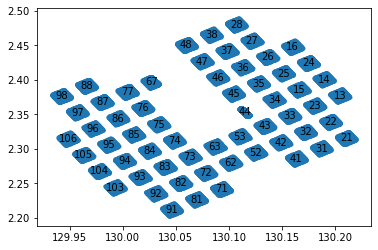

In [28]:
f = plt.figure()
ax = plt.axes()
ax.plot(t["ra"], t["dec"], '.')

for slot in uifuslots:
    jj =  t["ifuslot"] == slot
    ifura, ifudec = np.mean(t["ra"][jj]), np.mean(t["dec"][jj])
    plt.text(ifura, ifudec, slot, ha='center', va='center')

## combine all fibers of one IFU into a spectrum

In [16]:
ii = t["ifuslot"] == 77

In [17]:
len(fibers[0][1])

1036

In [18]:
wl = np.arange(len(fibers[0][1]) ) * 2. + 3470.

In [20]:
ifiber = np.arange(len(fibers))

In [21]:
s = []
for i in ifiber[ii]:
    s.append( fibers[i]["spectrum"] )
s = np.array(s)
    

In [22]:
mns = np.nanmean(s, axis=0)

(-0.05, 0.05)

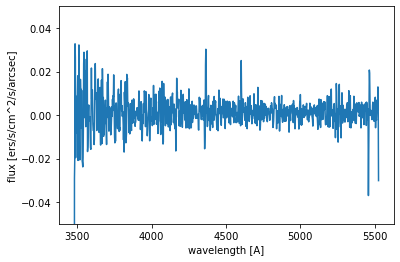

In [26]:
f = plt.figure()
ax = plt.axes()
ax.plot(wl, mns, '-')
plt.xlabel("wavelength [A]")
plt.ylabel("flux [ers/s/cm^2/s/arcsec]")
plt.ylim([-0.05,0.05])